# <font color=black> Analysis - FC-based parcellation using correlation </font>
<hr style="border:1px solid black">

In [1]:
import sys,json
import glob, os
import numpy as np
import nibabel as nib
import time
from nilearn import datasets, plotting, image, surface
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from fc_based_parcellation import FC_Parcellation

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Initialization
<hr style="border:0.5px solid black">

### Load existing configuration file ...

In [6]:
# Load the config file with all information
filetag = "C1toC7_gm_07_to_iCAP_mVisuel"
with open('../../../brain_spine/results/fc_parcellation/corr/' + filetag + '/config_' + filetag + '.json') as config_file:
    config = json.load(config_file)
source = 'spinalcord'
target = 'brain'
config['brain_surfaces']='/templates/surf/'
# Instantiate class
# Note: this will save a config file with all relevant information and prepare folder structure
fc_parcellation = FC_Parcellation(config,source,target,'corr')
colors = ["#1A04A4",'#0070FF','#07F6E0', "#9BFF00",'#E8F703', '#FA9C03', '#FF3A00']
# Create a ListedColormap from the specified colors
discretized_colormap = ListedColormap(colors)

### ... or build new one

In [77]:
# Load the config file with all information
with open('../../config/config_fc_based_parcellation_NK.json') as config_file:
    config = json.load(config_file)
# Define tag of this analysis (used for saving)
config['output_tag'] = "C1toC7_gm_07_to_iCAP_rFrontoPar"
# Define source, target, and the corresponding masks
source = 'spinalcord'
target = 'brain'
# Note: paths should be with respect to main directory
config['file_tag']['spinalcord'] = "_task-rest_bold_stc_sc_moco_brsc_BP_inTemplate_s.nii.gz"
config['file_tag']['brain'] = "_task-rest_bold_stc_brain_moco_brsc_BP_reg_SPM_inTemplate2mm_s.nii.gz"
config['template']['spinalcord'] = "/templates/PAM50_hc_project/template/PAM50_t2.nii.gz"
config['spinal_levels'] = "/templates/PAM50_hc_project/template/PAM50_spinal_levels_C1C7.nii.gz"
config['masks']['source'] = "/templates/PAM50_hc_project/template/PAM50_gm_bin07_C1C7.nii.gz"
config['masks']['target'] = "/analysis/masks/brain/iCAPs_z_rFrontoPar_bin.nii.gz"

config['brain_surfaces']='/templates/surf/'

config['list_subjects'] = ["P030", "P099","A006","A007","A008","A009","A011","A013","A023","A024","A025","A026","A027","A028","A029","A030","A032","A033","A034","A036","A037","A038","A039","A043","A044","A045","A046","A048","A050","A051","A052"]

# Instantiate class
# Note: this will save a config file with all relevant information and prepare folder structure
fc_parcellation = FC_Parcellation(config,source,target,'corr')
colors = ["#1A04A4",'#0070FF','#07F6E0', "#9BFF00",'#E8F703', '#FA9C03', '#FF3A00']
# Create a ListedColormap from the specified colors
discretized_colormap = ListedColormap(colors)

# Analyses
<hr style="border:0.5px solid black">

### Compute the voxelwise correlation & compute mean across participants

In [78]:
start = time.time()
# Loop through the subjects to compute fc 
for sub_id,sub in enumerate(fc_parcellation.config['list_subjects']): 
    print(f'\033[1mSUBJECT {sub}\033[0m')
    # Compute correlation without saving files
    fc_parcellation.compute_voxelwise_fc(sub=sub, 
                                        overwrite=False)
# Compute means
fc_parcellation.compute_mean_fc_sim(overwrite=False)
print("\033[1m... Operation performed in %.2f s!\033[0m" % (time.time() - start))

SUBJECT P030
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT P099
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A006
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A007
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A008
COMPUTE VOXELWISE FC
Standardize = True
Overwrite r

... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A052
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
COMPUTE MEAN ACROSS PARTICIPANTS
Overwrite results = False
... Computing mean FC
... Computing mean similarity matrix

DONE
... Operation performed in 620.07 s!


### Conduct leave-one-out validation analyses to check stability and select K

In [7]:
fc_parcellation.split_half_validity(stability=False,k_selection=True,k_range=range(2,11),reps=10,overwrite=True)

SPLIT-HALF VALIDATION
Overwrite results = True
Split-half clustering stability will be computed for range(2, 11) 
... Loading similarity matrices
... Rep: 1
...... Running clustering stability analysis for K = 2
...... Running clustering stability analysis for K = 3
...... Running clustering stability analysis for K = 4
...... Running clustering stability analysis for K = 5
...... Running clustering stability analysis for K = 6
...... Running clustering stability analysis for K = 7
...... Running clustering stability analysis for K = 8
...... Running clustering stability analysis for K = 9
...... Running clustering stability analysis for K = 10
... Rep: 2
...... Running clustering stability analysis for K = 2
...... Running clustering stability analysis for K = 3
...... Running clustering stability analysis for K = 4
...... Running clustering stability analysis for K = 5
...... Running clustering stability analysis for K = 6
...... Running clustering stability analysis for K = 7
......

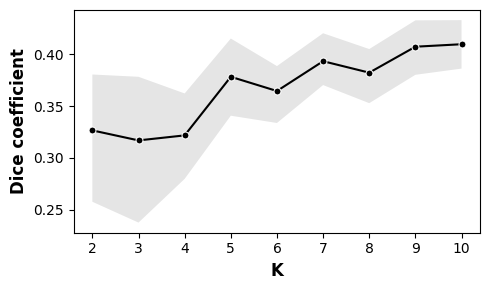

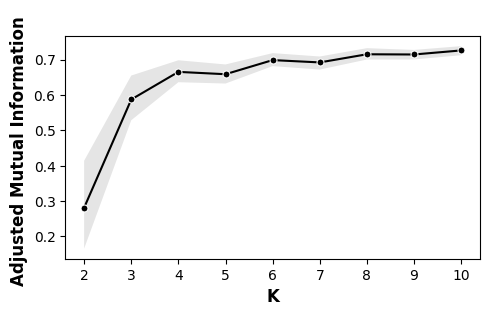

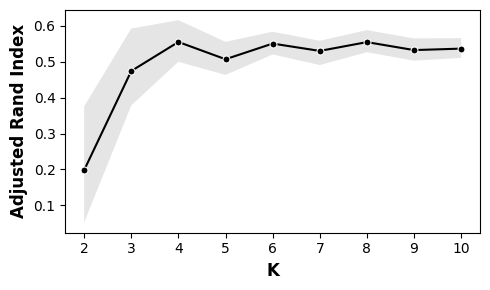

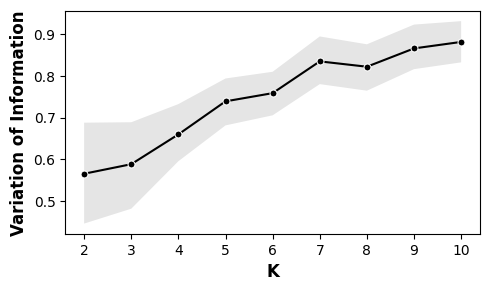

In [8]:
fc_parcellation.plot_split_half_validity(k_range=range(2,11))

### Compute the clustering on the mean similarity matrix and generate corresponding maps

In [5]:
# Run clustering and save labels
fc_parcellation.run_clustering(take_mean=True,sub=None,
                                k_range=range(2,21),features='sim',algorithm='agglom',
                                save_visplot_sc=True, overwrite=False)

CLUSTERING AT THE INDIVIDUAL LEVEL
Algorithm = spectral
Features = fc
K value(s) = 7
Overwrite results = False
Clustering will be done on the mean across participants!
K = 7
... Loading FC from file
... Running spectral clustering




/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


In [122]:
fc_parcellation.prepare_target_maps(label_type='mean',features='sim',indiv_algorithm='agglom',k_range=3,overwrite=False)

PREPARE TARGET MAPS
Type of source labels = mean
K value(s) = 3
Features = sim
Overwrite results = False
K = 3
... Target maps already computed
DONE



### Statistics and WTA analysis

In [123]:
fc_parcellation.stats_target_maps(label_type='mean',features='sim',indiv_algorithm='agglom',k_range=3,overwrite=False)

RUN STATISTICAL ANALYSIS
Type of source labels = mean
K value(s) = 3
Features = sim
Overwrite results = False
K = 3
... Statistical analysis already done
DONE



In [6]:
fc_parcellation.winner_takes_all(label_type='mean',input_type='corr',indiv_algorithm='agglom',features='sim',apply_threshold=0,cluster_threshold=100,k=7, order=[7,6,4,2,5,3,1], overwrite=True)

RUN WINNER-TAKES-ALL ANALYSIS
Type of source labels = mean
K value = 7
Features = sim
Overwrite results = True
K1 will have a value of 7
K2 will have a value of 6
K3 will have a value of 4
K4 will have a value of 2
K5 will have a value of 5
K6 will have a value of 3
K7 will have a value of 1
Using corr
Using corr
Using corr
Using corr
Using corr
Using corr
Using corr
DONE



/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


In [118]:
fc_parcellation.winner_takes_all_fc_mean(features='sim',indiv_algorithm='agglom',k=3, order=[3,1,2], overwrite=True)

RUN WINNER-TAKES-ALL ANALYSIS
K value = 3
Features = sim
Overwrite results = True
K1 will have a value of 3
K2 will have a value of 1
K3 will have a value of 2
DONE



/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


# Plotting
<hr style="border:0.5px solid black">

In [ ]:
for k_ind in range(1,8):
    img_to_show = '/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/C1toC7_gm_07_to_iCAP_SMC/target/sim/K7/wta_fc_mean/K7_' + str(k_ind) + '_fc_profile.nii.gz'
    for hemi in ['left','right']:
        img_surf = surface.vol_to_surf(img_to_show, config['main_dir'] + config['brain_surfaces'] + 'rh.pial', radius=0,interpolation='nearest', kind='auto', n_samples=10, mask_img=None, depth=None) if hemi == 'right' else surface.vol_to_surf(img_to_show, config['main_dir'] + config['brain_surfaces'] + 'lh.pial', radius=0,interpolation='nearest', kind='auto', n_samples=10, mask_img=None, depth=None)
           
        plot = plotting.plot_surf_stat_map(stat_map=img_surf, surf_mesh=config['main_dir']+config['brain_surfaces']+'rh.inflated' if hemi =='right' else config['main_dir']+config['brain_surfaces']+'lh.inflated',
                       cmap='cold_hot', colorbar=True,
                       hemi=hemi, view='lateral', threshold=0.015, vmin=-0.05,vmax=0.05,
                       bg_map=config['main_dir']+config['brain_surfaces']+'rh.sulc' if hemi=='right' else config['main_dir']+config['brain_surfaces']+'rh.sulc', #bg_on_data=True,
                       darkness=0.7)
        plot_path = '/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/C1toC7_gm_07_to_iCAP_SMC/target/sim/K7/wta_fc_mean/K7_' + str(k_ind) + '_fc_profile_' + hemi + '.png'
        plot.savefig(plot_path)

### WTA maps

RUN PLOTTING BRAIN MAPS
K value = 7
Showing = target
Features = sim
Save figure = True


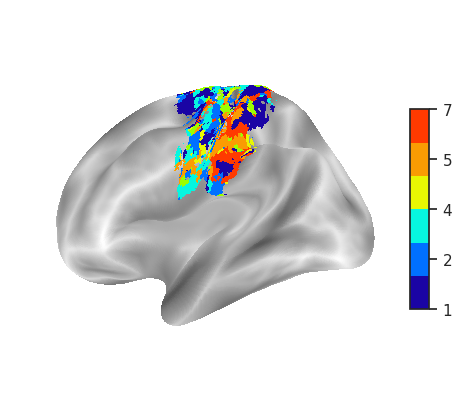

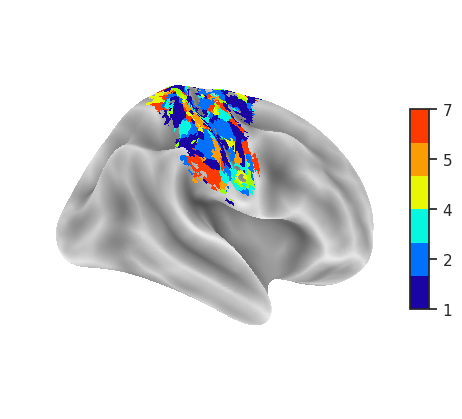

In [191]:
fc_parcellation.plot_brain_map(showing='target',k=7,input_type='corr',label_type='mean',wta_fc_mean=False,colormap=discretized_colormap,indiv_algorithm='agglom',features='sim', save_figure=True)

### Plot label maps

RUN PLOTTING SPINAL MAPS
K value = 7
Showing = source
Features = sim
Save figure = True
The plotting is displayed in neurological orientation (Left > Right)


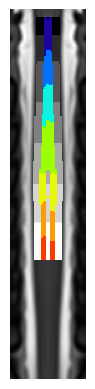

In [189]:
fc_parcellation.plot_spinal_map(showing='source',features='sim',wta_fc_mean=True,colormap=discretized_colormap,indiv_algorithm='agglom', k=7, order='from_file', group_type='mean', save_figure=True)

In [52]:
fc_parcellation.compute_similarity_spinal_levels(features='sim',indiv_algorithm='agglom', group_type='mean', save_figure=True)

COMPUTE SIMILARITY WITH ATLAS
Features = sim
COMPUTING SIMILARITY WITH METHOD: Dice
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kinany/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1126432/2127219974.py", line 1, in <module>
    fc_parcellation.compute_similarity_spinal_levels(features='sim',indiv_algorithm='agglom', group_type='mean', save_figure=True)
  File "/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/fc_based_parcellation.py", line 1260, in compute_similarity_spinal_levels
    similarity_matrix,_,orderY = compute_similarity(self.config, spinal_data, levels_data, thresh1=0.1, thresh2=0.1, method='Dice', match_compo=True, verbose=True)
  File "/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/compute_similarity.py", line 53, in compute_similarity
    k = np.max([data1.shape[3],data2.shape[3]]) # Save number of components for later use, shape 3 = number of components
IndexError: tuple index out of range

During handling o

### Validity
<hr style="border:0.5px solid black">

### Plot validity metrics

VALIDITY METRICS
K value(s) = range(3, 21)
Features = sim
Saving figures = True



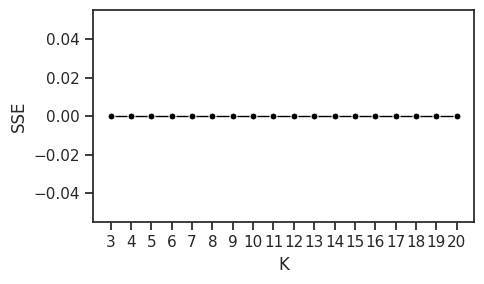

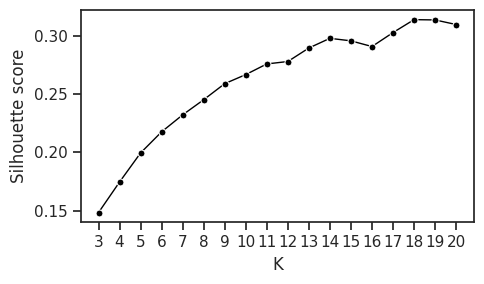

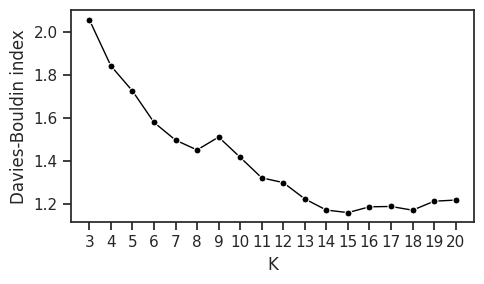

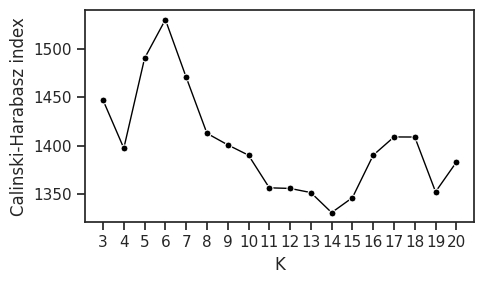

In [6]:
fc_parcellation.plot_validity(k_range=range(3,21),take_mean=True,features='sim',indiv_algorithm='agglom',internal=["SSE", "silhouette", "davies", "calinski"], save_figures=True)

In [68]:
icap_names = ['SMC','dDME','aDMN','lFrontoPar','rFrontoPar','lVisuel','mVisuel','parietal','auditory','cereb']
main_dir = '/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/'
source_tag = 'C1toC7_gm_07_to_iCAP_'
path_dice = '/source/sim/K7/mean_labels/'

In [73]:
import pandas as pd

# Initialize a 2D array to store the data
data_array = np.zeros((7, 10))

for i,icap in enumerate(icap_names):
    file = main_dir + source_tag + icap + path_dice + source_tag + icap + '_mean_agglom_labels_k7_diag_dice_atlas.txt'
    data = np.loadtxt(file)
    data_array[:, i] = data

# Create a DataFrame from the 2D array
combined_df = pd.DataFrame(data_array,columns=icap_names)

# Print the combined DataFrame
print(combined_df)


        SMC      dDME      aDMN  lFrontoPar  rFrontoPar   lVisuel   mVisuel  \
0  0.956910  0.858122  0.949501    0.732211    0.672203  0.844147  0.894771   
1  0.815702  0.902377  0.598502    0.714878    0.000000  0.681020  0.782356   
2  0.908722  0.861266  0.683103    0.638935    0.717949  0.618482  0.616000   
3  0.712218  0.597744  0.678880    0.845862    0.491780  0.978375  0.928133   
4  0.771548  0.768512  0.715909    0.813629    0.660328  0.745149  0.656036   
5  0.782687  0.692973  0.805983    0.743032    0.629174  0.636178  0.766107   
6  0.920863  0.000000  0.000000    0.000000    0.695652  0.000000  0.000000   

   parietal  auditory     cereb  
0  0.647913  0.803773  0.662226  
1  0.819804  0.818522  0.957854  
2  0.882193  0.667439  0.813798  
3  0.000000  0.676533  0.803922  
4  0.838772  0.712187  0.706748  
5  0.760331  0.745392  0.743215  
6  0.647636  0.000000  0.000000  


<AxesSubplot:>

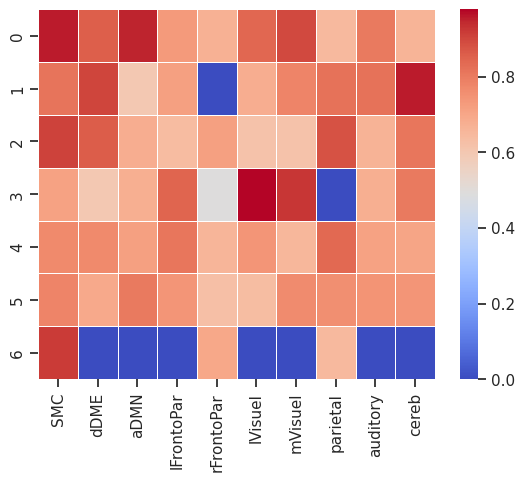

In [120]:
sns.heatmap(combined_df, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)


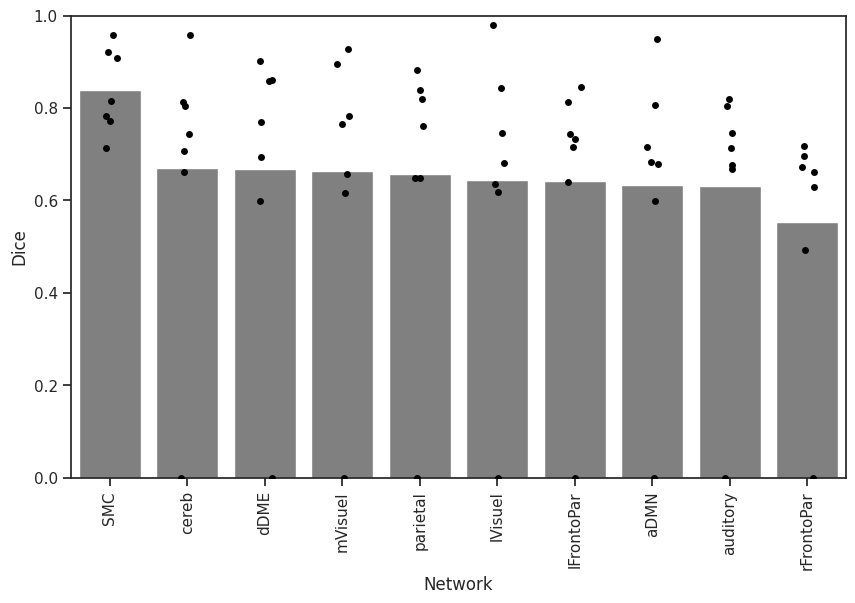

In [138]:
# Calculate the mean and SEM
mean_values = combined_df.mean()
sorted_mean_values = mean_values.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=sorted_mean_values.index, y=sorted_mean_values, color='gray')
# Create the strip plot with error bars
sns.stripplot(data=combined_df, jitter=True, color='black')

# Add labels and title
plt.xlabel('Network')
plt.ylabel('Dice')
plt.ylim(0, 1)
plt.xticks(rotation=90)

# Save the figure as a PDF
plt.savefig(main_dir + 'dice_all.pdf', format='pdf')

# Show the plot
plt.show()

In [139]:
sorted_mean_values

SMC           0.838379
cereb         0.669680
dDME          0.668713
mVisuel       0.663343
parietal      0.656664
lVisuel       0.643336
lFrontoPar    0.641221
aDMN          0.633125
auditory      0.631978
rFrontoPar    0.552441
dtype: float64

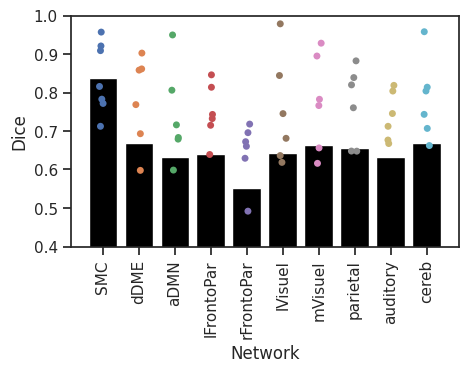

In [135]:
# Calculate the mean and SEM
mean_values = combined_df.mean()
sorted_mean_values = mean_values.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(5, 3))

# Create the strip plot with error bars
sns.stripplot(data=combined_df, jitter=True)
plt.bar(sorted_mean_values.index, sorted_mean_values, color='black')  

# Add labels and title
plt.xlabel('Network')
plt.ylabel('Dice')
plt.ylim(0.4, 1);
plt.xticks(rotation=90);
plt.savefig(main_dir + 'dice_all.pdf',format='pdf')

In [126]:
plt.savefig(main_dir + 'dice_all.pdf',format='pdf')

<Figure size 640x480 with 0 Axes>